In [1]:
pip install ultralytics

     -------------------------------------- 922.6/922.6 kB 8.3 MB/s eta 0:00:00
     --------------------------------------- 12.9/12.9 MB 24.2 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 28.7 MB/s eta 0:00:00
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
  Using cached PyYAML-6.0.2-cp311-cp311-win_amd64.whl (161 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
     --------------------------------------- 11.6/11.6 MB 19.3 MB/s eta 0:00:00
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)
     ---------------------------------------- 219.8/219.8 kB ? eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 23.6 MB/s


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Should return number of GPUs
print(torch.cuda.get_device_name(0))  # Prints the name of your GPU


True
1
NVIDIA GeForce RTX 2060


In [16]:
from pathlib import Path
print(len(list(Path("C:/chickeggs/dataset/test/images").glob("*.jpg"))))


740


In [ ]:
from ultralytics import YOLO
import torch
# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data= "C:\chickeggs\dataset\data.yaml",  # ไฟล์ข้อมูล dataset ที่ใช้เทรน  
    epochs=500,  # จำนวนรอบการฝึก 
    imgsz=640,  # ขนาดของภาพที่ใช้ในการเทรน 
    device="cuda",  # ใช้ GPU เทรน  
    workers=4,  # จำนวน threads ในการโหลดข้อมูล 
    batch=8,  # จำนวนภาพที่ประมวลผลต่อรอบ
    amp=True,  # ใช้ Automatic Mixed Precision 
    save_period=50,  # บันทึกโมเดลทุกๆ 50 epochs  
    optimizer="AdamW",  # ตัวปรับค่าพารามิเตอร์  
    lr0=0.002,  # ค่า Learning Rate เริ่มต้น  
    weight_decay=0.0005,  # ป้องกัน overfitting 
    patience=100,  # หยุดการเทรนถ้าไม่พัฒนาภายใน 100 epochs  
    save=True,  # บันทึกโมเดลที่ดีที่สุด  
    cache=True,  # โหลด dataset ไว้ใน RAM 
    dropout=0.1,  # ลด overfitting โดยสุ่มปิดบาง neuron 
    close_mosaic=10,  # ปิด Mosaic Augmentation ใน 10 epochs สุดท้าย  
)

# Evaluate model performance on the validation set
metrics = model.val()


Ultralytics 8.3.86  Python-3.11.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:\chickeggs\dataset\data.yaml, epochs=500, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=50, cache=True, device=cuda, workers=4, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

train: Scanning C:\chickeggs\dataset\train\labels... 10390 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10390/10390 [00:31<00:00, 333.62it/s]


train: New cache created: C:\chickeggs\dataset\train\labels.cache
train: 17.8GB RAM required to cache images with 50% safety margin but only 0.7/15.9GB available, not caching images 


val: Scanning C:\chickeggs\dataset\valid\labels... 1482 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1482/1482 [00:04<00:00, 304.38it/s]


val: New cache created: C:\chickeggs\dataset\valid\labels.cache
val: 2.5GB RAM required to cache images with 50% safety margin but only 0.3/15.9GB available, not caching images 
Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: AdamW(lr=0.002, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\train4
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500       5.6G      1.511      1.285       1.35        140        640: 100%|██████████| 1299/1299 [03:01<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.68it/s]


                   all       1482      26316      0.726      0.746      0.778      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      4.87G      1.412      1.048      1.311        113        640: 100%|██████████| 1299/1299 [03:11<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:14<00:00,  6.47it/s]


                   all       1482      26316      0.748      0.729      0.756      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      4.22G      1.428      1.036      1.317        398        640: 100%|██████████| 1299/1299 [02:51<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:14<00:00,  6.29it/s]


                   all       1482      26316      0.785       0.77        0.8      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      3.67G      1.355     0.9485      1.282         26        640: 100%|██████████| 1299/1299 [02:50<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.30it/s]


                   all       1482      26316      0.824      0.804      0.834      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      2.78G       1.31     0.8975      1.257        231        640: 100%|██████████| 1299/1299 [02:48<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:15<00:00,  6.08it/s]


                   all       1482      26316      0.828      0.811      0.848      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      4.35G      1.296     0.8699      1.256        177        640: 100%|██████████| 1299/1299 [02:48<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.05it/s]


                   all       1482      26316      0.812      0.795      0.839      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      3.63G      1.269     0.8376      1.226        123        640: 100%|██████████| 1299/1299 [02:45<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.31it/s]


                   all       1482      26316      0.824      0.826      0.855      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      4.59G      1.258     0.8232      1.227        152        640: 100%|██████████| 1299/1299 [02:52<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.68it/s]


                   all       1482      26316      0.836      0.836      0.861      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      3.72G      1.226     0.8016      1.214         73        640: 100%|██████████| 1299/1299 [02:44<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.71it/s]


                   all       1482      26316      0.819      0.841      0.858      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      4.01G      1.223     0.7927       1.21         71        640: 100%|██████████| 1299/1299 [02:38<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.92it/s]


                   all       1482      26316      0.843      0.817      0.859      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      4.46G      1.215     0.7684      1.191         62        640: 100%|██████████| 1299/1299 [02:59<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:15<00:00,  5.84it/s]


                   all       1482      26316      0.837      0.836      0.871      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      4.07G      1.213     0.7801      1.198        427        640: 100%|██████████| 1299/1299 [03:07<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:14<00:00,  6.59it/s]


                   all       1482      26316      0.831      0.837      0.866       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      3.46G        1.2     0.7639      1.189        200        640: 100%|██████████| 1299/1299 [02:42<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.48it/s]


                   all       1482      26316      0.834      0.829      0.849      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      3.99G      1.193     0.7655      1.184         48        640: 100%|██████████| 1299/1299 [02:35<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.66it/s]


                   all       1482      26316       0.85      0.849      0.882      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      3.39G       1.17      0.742      1.172         94        640: 100%|██████████| 1299/1299 [02:34<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.60it/s]


                   all       1482      26316      0.856      0.858      0.891      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      3.39G      1.157      0.732      1.167         58        640: 100%|██████████| 1299/1299 [03:03<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.27it/s]


                   all       1482      26316      0.861      0.862      0.889      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      3.93G      1.183     0.7345      1.179        177        640: 100%|██████████| 1299/1299 [02:37<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.36it/s]


                   all       1482      26316      0.854      0.866      0.892      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      2.16G      1.163     0.7188      1.166        302        640: 100%|██████████| 1299/1299 [02:38<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.74it/s]

                   all       1482      26316      0.858       0.86       0.89      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      3.26G      1.143     0.7124      1.162        260        640: 100%|██████████| 1299/1299 [02:46<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.31it/s]


                   all       1482      26316      0.867      0.858      0.896      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      3.98G      1.139     0.7117      1.149        227        640: 100%|██████████| 1299/1299 [03:01<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.40it/s]


                   all       1482      26316      0.869      0.858      0.897      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      3.44G       1.14     0.7051      1.156         49        640: 100%|██████████| 1299/1299 [02:44<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.09it/s]


                   all       1482      26316      0.856      0.867      0.889      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      3.86G      1.131      0.703      1.156        182        640: 100%|██████████| 1299/1299 [02:47<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.18it/s]

                   all       1482      26316      0.867      0.871      0.902      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      3.77G      1.125      0.693      1.151        303        640: 100%|██████████| 1299/1299 [02:51<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.71it/s]

                   all       1482      26316      0.864       0.87      0.901      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      1.99G      1.122     0.6939      1.146         92        640: 100%|██████████| 1299/1299 [02:43<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.30it/s]

                   all       1482      26316      0.878      0.862      0.902       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      4.34G      1.112     0.6828      1.146        521        640: 100%|██████████| 1299/1299 [02:49<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.25it/s]

                   all       1482      26316      0.875      0.868      0.907      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      3.57G      1.093     0.6664      1.128         66        640: 100%|██████████| 1299/1299 [02:47<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.73it/s]


                   all       1482      26316      0.877      0.875      0.911      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      4.66G      1.103     0.6727      1.131         39        640: 100%|██████████| 1299/1299 [02:53<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.45it/s]


                   all       1482      26316      0.875      0.872      0.911      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      3.22G      1.102     0.6706      1.137        152        640: 100%|██████████| 1299/1299 [02:47<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.30it/s]

                   all       1482      26316      0.869       0.88      0.909      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      3.89G      1.106     0.6703      1.133         58        640: 100%|██████████| 1299/1299 [02:42<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.04it/s]

                   all       1482      26316      0.872      0.879      0.905      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      4.52G      1.098     0.6685      1.132         95        640: 100%|██████████| 1299/1299 [03:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.00it/s]


                   all       1482      26316      0.875       0.88      0.909      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      4.27G      1.107     0.6715      1.139        163        640: 100%|██████████| 1299/1299 [02:58<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.68it/s]


                   all       1482      26316      0.874      0.878      0.912      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500       5.1G      1.093     0.6649      1.128        228        640: 100%|██████████| 1299/1299 [02:59<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.89it/s]

                   all       1482      26316      0.882      0.874      0.914      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      4.36G      1.082     0.6545      1.119         58        640: 100%|██████████| 1299/1299 [02:50<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.36it/s]


                   all       1482      26316      0.881      0.884      0.918       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      4.06G      1.074     0.6483      1.113         87        640: 100%|██████████| 1299/1299 [02:46<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.14it/s]

                   all       1482      26316      0.886      0.878      0.917       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      3.73G       1.08     0.6493      1.118         38        640: 100%|██████████| 1299/1299 [02:42<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.32it/s]

                   all       1482      26316      0.878      0.884      0.917      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      3.33G      1.083     0.6528      1.121        150        640: 100%|██████████| 1299/1299 [02:43<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.90it/s]

                   all       1482      26316      0.881      0.885      0.919      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      4.13G      1.065      0.634      1.108         79        640: 100%|██████████| 1299/1299 [02:34<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.94it/s]

                   all       1482      26316      0.883      0.885      0.918      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      3.11G      1.079      0.644      1.121         46        640: 100%|██████████| 1299/1299 [02:58<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.81it/s]


                   all       1482      26316      0.886      0.885      0.918       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      3.58G      1.069      0.645      1.116        136        640: 100%|██████████| 1299/1299 [02:58<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.17it/s]


                   all       1482      26316      0.885      0.886      0.918      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      3.08G      1.056     0.6331      1.107        113        640: 100%|██████████| 1299/1299 [02:46<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.21it/s]

                   all       1482      26316      0.881       0.89      0.921      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      3.89G      1.077     0.6405       1.12         56        640: 100%|██████████| 1299/1299 [02:46<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.10it/s]

                   all       1482      26316      0.889      0.883      0.917      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      3.08G      1.062     0.6334       1.11        347        640: 100%|██████████| 1299/1299 [02:55<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.16it/s]


                   all       1482      26316      0.887      0.885       0.92      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      3.04G      1.057     0.6247      1.103         95        640: 100%|██████████| 1299/1299 [02:42<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.45it/s]

                   all       1482      26316      0.886      0.888      0.919      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      3.62G      1.057     0.6314       1.11         62        640: 100%|██████████| 1299/1299 [02:41<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.46it/s]

                   all       1482      26316      0.885      0.891      0.922      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      4.66G      1.051     0.6231      1.103        102        640: 100%|██████████| 1299/1299 [02:48<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.17it/s]

                   all       1482      26316      0.886      0.889      0.923      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      4.21G      1.064     0.6278      1.112         35        640: 100%|██████████| 1299/1299 [02:55<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:15<00:00,  6.05it/s]


                   all       1482      26316      0.887      0.892      0.924      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      4.12G      1.044     0.6195      1.103        265        640: 100%|██████████| 1299/1299 [02:52<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.05it/s]

                   all       1482      26316      0.884      0.891      0.922      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      3.56G      1.051      0.623      1.103        200        640: 100%|██████████| 1299/1299 [02:45<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:14<00:00,  6.33it/s]


                   all       1482      26316      0.885       0.89      0.921      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500         4G      1.067     0.6259      1.106         85        640: 100%|██████████| 1299/1299 [02:52<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.14it/s]

                   all       1482      26316      0.883      0.894      0.923      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      3.18G      1.029     0.6082      1.094        117        640: 100%|██████████| 1299/1299 [02:40<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.61it/s]

                   all       1482      26316      0.887      0.891      0.923      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      3.39G      1.044     0.6182        1.1        109        640: 100%|██████████| 1299/1299 [02:41<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.25it/s]

                   all       1482      26316      0.886      0.893      0.923      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500       3.7G      1.033     0.6121      1.097        113        640: 100%|██████████| 1299/1299 [02:52<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.41it/s]

                   all       1482      26316      0.885      0.891      0.923      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      2.88G      1.033     0.6103      1.094        169        640: 100%|██████████| 1299/1299 [02:59<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:14<00:00,  6.49it/s]

                   all       1482      26316      0.887      0.892      0.923      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      3.41G      1.038     0.6119      1.099         66        640: 100%|██████████| 1299/1299 [02:51<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.51it/s]

                   all       1482      26316      0.888      0.892      0.924      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      4.03G       1.03     0.6077      1.093        208        640: 100%|██████████| 1299/1299 [02:54<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:14<00:00,  6.37it/s]


                   all       1482      26316      0.889       0.89      0.922      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      3.28G      1.027     0.6013      1.089         48        640: 100%|██████████| 1299/1299 [02:53<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.02it/s]

                   all       1482      26316      0.887      0.896      0.926      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      3.76G      1.028      0.602      1.088         25        640: 100%|██████████| 1299/1299 [02:59<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.85it/s]


                   all       1482      26316      0.891      0.895      0.927        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      3.05G       1.03     0.6067      1.094        113        640: 100%|██████████| 1299/1299 [03:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.13it/s]

                   all       1482      26316      0.887      0.897      0.925      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      4.21G      1.017     0.5973      1.083         90        640: 100%|██████████| 1299/1299 [02:52<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.98it/s]

                   all       1482      26316      0.884      0.899      0.925      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      4.11G      1.026      0.604      1.092        118        640: 100%|██████████| 1299/1299 [03:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.17it/s]

                   all       1482      26316      0.889      0.896      0.926      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      3.85G      1.017     0.5959      1.084         62        640: 100%|██████████| 1299/1299 [02:47<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.36it/s]

                   all       1482      26316      0.891      0.895      0.927        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      3.03G       1.02      0.597      1.084        367        640: 100%|██████████| 1299/1299 [03:08<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.30it/s]

                   all       1482      26316       0.89      0.896      0.927      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      4.36G      1.022     0.5965      1.084         81        640: 100%|██████████| 1299/1299 [02:53<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:14<00:00,  6.27it/s]

                   all       1482      26316      0.898      0.891      0.928      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      3.66G      1.019     0.5927      1.082         88        640: 100%|██████████| 1299/1299 [02:41<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.48it/s]

                   all       1482      26316       0.89      0.898      0.929      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      2.95G      1.026     0.6005      1.088        424        640: 100%|██████████| 1299/1299 [02:40<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.06it/s]


                   all       1482      26316      0.889      0.899      0.929      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500       4.4G      1.017     0.5963      1.082         81        640: 100%|██████████| 1299/1299 [02:41<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.86it/s]

                   all       1482      26316       0.89      0.898      0.929      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      3.64G      1.014     0.5888       1.08        472        640: 100%|██████████| 1299/1299 [02:41<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.87it/s]

                   all       1482      26316       0.89        0.9      0.929      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      3.91G      1.029     0.5937      1.086         55        640: 100%|██████████| 1299/1299 [02:45<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.11it/s]

                   all       1482      26316      0.892      0.898      0.929      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      2.86G      1.009     0.5897      1.082         70        640: 100%|██████████| 1299/1299 [02:42<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.75it/s]

                   all       1482      26316      0.891      0.899      0.929      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      3.56G          1     0.5811      1.074        481        640: 100%|██████████| 1299/1299 [02:30<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.05it/s]

                   all       1482      26316      0.893      0.898      0.929      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      3.11G      1.005     0.5855      1.077        616        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.09it/s]

                   all       1482      26316      0.894      0.896       0.93      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      3.42G     0.9877     0.5751      1.067         35        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.10it/s]

                   all       1482      26316      0.893      0.897      0.929      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      4.54G      1.016     0.5842      1.081        141        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.08it/s]

                   all       1482      26316      0.896      0.896       0.93      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      3.04G     0.9978     0.5781      1.071         45        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.05it/s]

                   all       1482      26316      0.895      0.898      0.929      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      3.39G      1.009     0.5885       1.08         87        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.08it/s]

                   all       1482      26316      0.897      0.897       0.93      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500         3G      0.999     0.5787      1.074         40        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.08it/s]

                   all       1482      26316      0.896      0.899       0.93      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      2.67G      1.006     0.5832      1.075         79        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.15it/s]

                   all       1482      26316      0.896      0.899       0.93      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      3.68G     0.9927     0.5742       1.07        110        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.96it/s]

                   all       1482      26316      0.895        0.9       0.93      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      4.69G     0.9914     0.5725      1.069        139        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.14it/s]

                   all       1482      26316      0.897      0.899      0.931      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      4.93G     0.9884      0.572      1.065         32        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.07it/s]

                   all       1482      26316      0.896      0.901      0.932      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      3.42G     0.9907      0.571      1.067         73        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.07it/s]

                   all       1482      26316      0.896      0.901      0.932      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      3.53G     0.9887     0.5675      1.063         48        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.12it/s]

                   all       1482      26316      0.896      0.902      0.932      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      3.39G     0.9867     0.5678      1.064         74        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.15it/s]

                   all       1482      26316      0.896      0.902      0.932      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      4.46G     0.9878     0.5712      1.066        265        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.896      0.902      0.932      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      3.05G     0.9836     0.5668      1.066         32        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.12it/s]

                   all       1482      26316      0.897      0.902      0.932      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      4.25G     0.9874     0.5679      1.068         90        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.08it/s]


                   all       1482      26316      0.896      0.902      0.932      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      3.34G     0.9826     0.5694      1.062         69        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.05it/s]

                   all       1482      26316      0.897      0.902      0.933      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      3.37G     0.9858     0.5656      1.066         96        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.15it/s]

                   all       1482      26316      0.896      0.902      0.932       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      4.17G     0.9819     0.5675      1.067        116        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.11it/s]

                   all       1482      26316      0.896      0.903      0.933       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      3.01G      0.983      0.566      1.066        283        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.13it/s]

                   all       1482      26316      0.897      0.903      0.933       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      2.69G     0.9762     0.5599      1.057         69        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.897      0.903      0.933      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      3.41G      0.976     0.5613      1.062        250        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.05it/s]

                   all       1482      26316      0.897      0.902      0.933      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      3.99G     0.9822     0.5606      1.059        109        640: 100%|██████████| 1299/1299 [02:33<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.91it/s]

                   all       1482      26316      0.897      0.902      0.934      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      4.45G      0.967     0.5552      1.055         51        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.895      0.903      0.933      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500       3.1G     0.9795      0.561      1.061         56        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.12it/s]


                   all       1482      26316      0.895      0.904      0.933      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      3.74G     0.9765     0.5577      1.058         70        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.13it/s]

                   all       1482      26316      0.894      0.905      0.933      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      3.01G     0.9689     0.5563      1.056         26        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.894      0.904      0.933      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      3.94G     0.9747     0.5589      1.061         80        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.01it/s]

                   all       1482      26316      0.894      0.904      0.933      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      2.78G     0.9739     0.5585       1.06         67        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.13it/s]

                   all       1482      26316      0.894      0.905      0.933      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      3.92G     0.9711     0.5585       1.06        220        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.896      0.905      0.933      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      3.05G     0.9767     0.5596      1.062         13        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.10it/s]

                   all       1482      26316      0.896      0.905      0.934      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      3.55G     0.9698     0.5548      1.057        107        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.08it/s]

                   all       1482      26316      0.896      0.905      0.934      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      4.18G     0.9771     0.5588      1.056        226        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.09it/s]

                   all       1482      26316      0.897      0.904      0.934      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      3.39G     0.9721     0.5543      1.053         80        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.897      0.904      0.934      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      3.39G     0.9595     0.5526      1.054        254        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.09it/s]

                   all       1482      26316      0.896      0.904      0.934      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      4.27G     0.9686     0.5525      1.056        274        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.897      0.904      0.934      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      3.39G     0.9573     0.5495      1.047         72        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.96it/s]

                   all       1482      26316      0.896      0.904      0.934      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      3.14G     0.9559      0.547       1.05        141        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.15it/s]

                   all       1482      26316      0.897      0.903      0.934      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      4.21G     0.9632     0.5492      1.051         20        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.04it/s]

                   all       1482      26316      0.897      0.904      0.934      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      3.59G     0.9576     0.5495      1.054        129        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.19it/s]

                   all       1482      26316      0.896      0.904      0.934      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      3.41G     0.9653     0.5492      1.051        143        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.92it/s]

                   all       1482      26316      0.896      0.905      0.934      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      3.36G     0.9708     0.5505      1.058         56        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.06it/s]

                   all       1482      26316      0.897      0.904      0.934      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      4.25G     0.9579     0.5432      1.049        190        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.04it/s]

                   all       1482      26316      0.897      0.903      0.934      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      3.81G     0.9597     0.5468      1.051         49        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.07it/s]

                   all       1482      26316      0.898      0.903      0.934      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      3.46G     0.9613     0.5468      1.053         75        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.898      0.903      0.934      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      3.28G     0.9481     0.5386      1.047        234        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.899      0.903      0.934      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      3.29G     0.9588     0.5408      1.046        190        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.00it/s]

                   all       1482      26316        0.9      0.902      0.935      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      3.05G     0.9511     0.5396      1.044         46        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.98it/s]

                   all       1482      26316        0.9      0.902      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      2.66G      0.956     0.5452      1.047         60        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.12it/s]

                   all       1482      26316      0.901      0.902      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      3.18G     0.9561     0.5373      1.045         53        640: 100%|██████████| 1299/1299 [02:31<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.92it/s]

                   all       1482      26316        0.9      0.903      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      4.18G     0.9532     0.5442      1.049        213        640: 100%|██████████| 1299/1299 [02:33<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316        0.9      0.903      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      4.05G     0.9488     0.5395      1.045         71        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.07it/s]

                   all       1482      26316        0.9      0.903      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      4.23G     0.9602     0.5382      1.046         40        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.11it/s]

                   all       1482      26316        0.9      0.903      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500       3.1G     0.9506     0.5384      1.048         66        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.98it/s]

                   all       1482      26316      0.901      0.903      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      3.58G     0.9532     0.5438      1.049         55        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.09it/s]

                   all       1482      26316      0.901      0.903      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500       3.3G      0.947     0.5368      1.042         79        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.01it/s]

                   all       1482      26316      0.901      0.902      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      4.02G     0.9625     0.5437      1.049        108        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.09it/s]

                   all       1482      26316      0.902      0.903      0.936      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      3.63G     0.9499     0.5335      1.041        140        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.06it/s]

                   all       1482      26316      0.902      0.902      0.936      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      3.76G     0.9477     0.5373      1.044        161        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.06it/s]

                   all       1482      26316      0.902      0.902      0.936      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      4.05G     0.9417     0.5305      1.038         53        640: 100%|██████████| 1299/1299 [02:36<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.07it/s]

                   all       1482      26316      0.902      0.902      0.936      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      3.35G     0.9396     0.5315      1.042        119        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.08it/s]

                   all       1482      26316      0.902      0.902      0.936      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      3.47G     0.9405     0.5292       1.04         35        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.07it/s]

                   all       1482      26316      0.903      0.902      0.936      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      3.31G     0.9411     0.5289      1.038         62        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.09it/s]

                   all       1482      26316      0.903      0.902      0.936      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      3.69G      0.936     0.5261      1.033        163        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.09it/s]

                   all       1482      26316      0.904      0.901      0.936      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      2.79G     0.9332     0.5285      1.039         47        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.03it/s]

                   all       1482      26316      0.903      0.901      0.936      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      2.97G     0.9384     0.5296      1.038        141        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.03it/s]

                   all       1482      26316      0.904      0.901      0.936      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      3.85G     0.9368     0.5279      1.039        168        640: 100%|██████████| 1299/1299 [02:28<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.00it/s]

                   all       1482      26316      0.904      0.901      0.936      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      3.23G     0.9258     0.5242      1.034         61        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.94it/s]

                   all       1482      26316      0.904      0.901      0.936      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      3.94G     0.9515     0.5356      1.045        275        640: 100%|██████████| 1299/1299 [02:30<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.01it/s]

                   all       1482      26316      0.904      0.901      0.937      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      3.51G     0.9337     0.5229      1.038         50        640: 100%|██████████| 1299/1299 [02:30<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.80it/s]

                   all       1482      26316      0.905      0.901      0.937      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      4.12G     0.9365     0.5262      1.036        141        640: 100%|██████████| 1299/1299 [02:30<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.99it/s]

                   all       1482      26316      0.905      0.901      0.937      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500       4.6G     0.9417     0.5308      1.044         49        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.01it/s]

                   all       1482      26316      0.904      0.902      0.937      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      4.19G     0.9394     0.5307      1.039        290        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.904      0.902      0.937      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500       3.1G     0.9309      0.523      1.032         78        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.06it/s]

                   all       1482      26316      0.903      0.903      0.937       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      3.75G     0.9421       0.53      1.038        117        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.904      0.902      0.937       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      3.38G     0.9384     0.5274      1.037         56        640: 100%|██████████| 1299/1299 [02:24<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.19it/s]

                   all       1482      26316      0.903      0.903      0.937       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      4.01G     0.9419     0.5277      1.039        117        640: 100%|██████████| 1299/1299 [02:24<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.904      0.902      0.937       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      3.79G     0.9381     0.5302       1.04        167        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.09it/s]

                   all       1482      26316      0.904      0.903      0.937       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      3.33G     0.9352     0.5237      1.035         30        640: 100%|██████████| 1299/1299 [02:24<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.13it/s]

                   all       1482      26316      0.905      0.902      0.937       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      3.72G     0.9383     0.5261      1.036        101        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.905      0.903      0.937       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500       3.5G     0.9341     0.5257      1.036         28        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.19it/s]

                   all       1482      26316      0.905      0.902      0.938       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      3.12G     0.9225     0.5196      1.034         97        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.12it/s]

                   all       1482      26316      0.905      0.902      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      3.02G     0.9263      0.523      1.032         75        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.10it/s]

                   all       1482      26316      0.906      0.902      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      3.54G     0.9352     0.5248      1.039         63        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.01it/s]

                   all       1482      26316      0.906      0.902      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      3.86G     0.9263     0.5188      1.032        196        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.905      0.902      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      5.04G     0.9315     0.5224      1.033        110        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.905      0.903      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      3.87G     0.9262     0.5223      1.032        109        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.905      0.903      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      4.04G     0.9207     0.5131      1.028        277        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.10it/s]

                   all       1482      26316      0.905      0.903      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      4.36G     0.9229     0.5172       1.03         57        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.09it/s]

                   all       1482      26316      0.906      0.903      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      4.26G     0.9157     0.5111      1.027        109        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.03it/s]

                   all       1482      26316      0.906      0.903      0.938      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      3.03G     0.9239     0.5181      1.031        233        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.06it/s]

                   all       1482      26316      0.906      0.904      0.938      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      3.98G     0.9351     0.5247      1.034         78        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.10it/s]

                   all       1482      26316      0.906      0.904      0.939      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      3.23G     0.9286     0.5181      1.031         69        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.906      0.903      0.939      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      3.81G     0.9272     0.5206      1.034        190        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.907      0.904      0.939      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      3.37G     0.9195      0.517      1.029        292        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.12it/s]

                   all       1482      26316      0.907      0.904      0.939      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      3.57G     0.9206     0.5155      1.031        251        640: 100%|██████████| 1299/1299 [02:32<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.94it/s]

                   all       1482      26316      0.907      0.904      0.939      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      5.08G     0.9193     0.5124      1.028        215        640: 100%|██████████| 1299/1299 [02:55<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.09it/s]

                   all       1482      26316      0.908      0.904      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      3.86G     0.9262     0.5166       1.03         97        640: 100%|██████████| 1299/1299 [02:52<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.29it/s]

                   all       1482      26316      0.907      0.904      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500       3.7G     0.9213     0.5166      1.028        139        640: 100%|██████████| 1299/1299 [02:48<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.14it/s]

                   all       1482      26316      0.908      0.904      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      3.23G     0.9194     0.5112      1.027        139        640: 100%|██████████| 1299/1299 [02:47<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.46it/s]

                   all       1482      26316      0.909      0.903      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      3.06G     0.9165     0.5126      1.027        107        640: 100%|██████████| 1299/1299 [02:47<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:14<00:00,  6.63it/s]

                   all       1482      26316      0.909      0.903      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      3.42G     0.9151     0.5128      1.025        328        640: 100%|██████████| 1299/1299 [02:49<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.34it/s]

                   all       1482      26316       0.91      0.903      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      3.53G      0.911     0.5097      1.023        127        640: 100%|██████████| 1299/1299 [02:50<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.14it/s]

                   all       1482      26316       0.91      0.904      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      3.31G      0.921     0.5159      1.029         54        640: 100%|██████████| 1299/1299 [02:47<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.17it/s]

                   all       1482      26316       0.91      0.904      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      4.06G     0.9114     0.5081      1.027        141        640: 100%|██████████| 1299/1299 [02:48<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  7.12it/s]

                   all       1482      26316       0.91      0.904      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      3.75G      0.919     0.5136      1.023         40        640: 100%|██████████| 1299/1299 [02:40<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.911      0.903      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      2.79G     0.9098     0.5094      1.024        186        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316       0.91      0.904      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500       3.1G     0.9196     0.5153      1.027         82        640: 100%|██████████| 1299/1299 [02:24<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.12it/s]

                   all       1482      26316      0.911      0.904      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      3.72G     0.9062     0.5069      1.021         80        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.24it/s]

                   all       1482      26316      0.909      0.905      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500       4.2G     0.9066     0.5044      1.024         88        640: 100%|██████████| 1299/1299 [02:24<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.21it/s]

                   all       1482      26316       0.91      0.904      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      5.02G     0.9193     0.5066      1.026         24        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.10it/s]

                   all       1482      26316       0.91      0.904      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      3.34G     0.9139     0.5119      1.028        497        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316       0.91      0.904      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      4.07G     0.9168     0.5103      1.028         53        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316       0.91      0.904      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      3.84G     0.9041     0.5022      1.019         75        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316       0.91      0.904      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      3.63G     0.9064     0.5055      1.024        276        640: 100%|██████████| 1299/1299 [02:24<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.911      0.905      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      3.03G      0.908     0.5079      1.027         37        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316       0.91      0.904      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      3.58G     0.9094     0.5034      1.022         82        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316       0.91      0.904      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      3.38G     0.9071     0.5008      1.021        100        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316       0.91      0.904      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      5.01G     0.9154     0.5061      1.022        206        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.38it/s]

                   all       1482      26316      0.911      0.904      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      3.27G      0.901     0.5017      1.018         29        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.911      0.904       0.94      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      3.28G     0.9127     0.5076      1.023        182        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.911      0.904       0.94      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500       2.6G     0.9085     0.5042      1.021         47        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316       0.91      0.905       0.94      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      2.77G     0.9059     0.5038      1.024        381        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316       0.91      0.905       0.94      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      4.02G     0.9013     0.5053      1.022         33        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316       0.91      0.905       0.94      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      3.49G     0.9017     0.5056      1.024        407        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316       0.91      0.905       0.94      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      3.84G     0.9011     0.4992       1.02        269        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316       0.91      0.906       0.94      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      3.19G     0.9057     0.5014      1.022         57        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.12it/s]

                   all       1482      26316      0.911      0.904       0.94      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      4.25G     0.9017     0.5044       1.02         45        640: 100%|██████████| 1299/1299 [02:24<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.911      0.904       0.94      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500       3.3G      0.906     0.5019      1.021         69        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.11it/s]

                   all       1482      26316      0.912      0.904       0.94      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500         3G     0.9139     0.5078      1.025         61        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.911      0.905       0.94      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      4.34G     0.9016     0.5037      1.021        108        640: 100%|██████████| 1299/1299 [02:24<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.21it/s]

                   all       1482      26316      0.911      0.905       0.94      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      3.23G     0.8964     0.4986      1.017        105        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.15it/s]

                   all       1482      26316      0.912      0.905       0.94      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      3.45G     0.8981     0.4978       1.02        208        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.13it/s]

                   all       1482      26316      0.912      0.905       0.94      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      3.81G     0.9017     0.5015      1.019         65        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.912      0.904      0.941      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      2.73G     0.9086     0.5033      1.021         81        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.07it/s]

                   all       1482      26316      0.912      0.904      0.941      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      3.74G     0.8933     0.4986      1.018        237        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.913      0.904      0.941      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      4.58G     0.9021     0.4979       1.02         20        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.913      0.904       0.94      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500       2.9G      0.899     0.4982      1.017        283        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.912      0.904      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      3.64G     0.9022     0.5012      1.019        172        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.911      0.905      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500       2.7G     0.8914     0.4911      1.011         34        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.911      0.905       0.94      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      3.46G     0.8994      0.497      1.015        154        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.911      0.905       0.94      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500       3.7G     0.8971     0.4984      1.016         40        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.911      0.905      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      3.31G     0.8947     0.4971      1.016        136        640: 100%|██████████| 1299/1299 [02:24<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.35it/s]

                   all       1482      26316      0.912      0.904      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      4.46G     0.8988      0.496      1.017        400        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.912      0.905      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      3.28G     0.9026     0.4983      1.017         48        640: 100%|██████████| 1299/1299 [02:24<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.19it/s]

                   all       1482      26316      0.912      0.904      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      2.99G     0.8989     0.4978      1.019        102        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.912      0.905      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      3.47G     0.9043     0.4993      1.019         93        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.912      0.905      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      3.87G     0.8933     0.4915      1.013         49        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.10it/s]

                   all       1482      26316      0.912      0.905      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      5.31G      0.891     0.4931      1.016         76        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.912      0.905      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500       3.5G     0.8835     0.4887      1.012        108        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.13it/s]

                   all       1482      26316      0.912      0.905      0.941      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      3.96G     0.8953     0.4929      1.016         70        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.913      0.905      0.941      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      3.39G     0.8938     0.4937      1.016        194        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.19it/s]

                   all       1482      26316      0.913      0.905      0.941      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      5.03G     0.8952     0.4977      1.019        292        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.913      0.906      0.941      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      3.58G     0.8872     0.4898      1.013         68        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.36it/s]

                   all       1482      26316      0.913      0.906      0.942      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      3.49G     0.8973     0.4985      1.019        104        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.21it/s]

                   all       1482      26316      0.913      0.906      0.942      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      3.61G     0.8925     0.4914      1.016         45        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.913      0.905      0.942      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      3.27G     0.8955     0.4963      1.017         79        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.33it/s]

                   all       1482      26316      0.914      0.906      0.942      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      3.92G     0.8769     0.4875      1.007        176        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316      0.914      0.906      0.942      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      4.06G      0.896     0.4953      1.016        305        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.914      0.906      0.942      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      4.27G     0.8803     0.4891      1.008        105        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.915      0.905      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      3.73G     0.8892     0.4901      1.013         88        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.915      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      4.05G     0.9003     0.4947      1.014         92        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.13it/s]

                   all       1482      26316      0.915      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      3.75G     0.8809     0.4875      1.003        145        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.915      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500       2.9G     0.8886     0.4887      1.009         87        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.915      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      3.11G     0.8862     0.4879      1.014         91        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.08it/s]

                   all       1482      26316      0.915      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      4.23G      0.881      0.484      1.005        291        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.11it/s]

                   all       1482      26316      0.915      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      4.15G     0.8845     0.4862       1.01        230        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.15it/s]

                   all       1482      26316      0.915      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      2.99G     0.8815      0.486      1.009        317        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.915      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      4.27G     0.8889     0.4925      1.014         36        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.916      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500       4.4G     0.8897     0.4926      1.013        209        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.916      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      4.28G     0.8911     0.4925      1.015        130        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.916      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      3.42G      0.885     0.4882      1.012        242        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.09it/s]

                   all       1482      26316      0.916      0.906      0.942      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      3.61G     0.8869     0.4888      1.011         98        640: 100%|██████████| 1299/1299 [02:24<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.917      0.906      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      3.88G     0.8834     0.4849      1.009        138        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.917      0.907      0.942       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      3.35G     0.8816      0.485      1.012        282        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.917      0.907      0.942       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      3.33G     0.8771     0.4831       1.01        107        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.917      0.907      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      3.45G       0.88      0.485      1.008         56        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.917      0.906      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      2.95G     0.8815     0.4842       1.01        216        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.24it/s]

                   all       1482      26316      0.917      0.907      0.942       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500         3G     0.8783     0.4797      1.006        290        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.14it/s]

                   all       1482      26316      0.918      0.907      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      3.31G     0.8839     0.4872      1.009        190        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.917      0.907      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      3.24G     0.8787     0.4822      1.005        387        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.19it/s]

                   all       1482      26316      0.918      0.907      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      3.25G     0.8732     0.4779      1.003        114        640: 100%|██████████| 1299/1299 [02:27<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.04it/s]

                   all       1482      26316      0.918      0.907      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      3.48G     0.8768     0.4841      1.005         42        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.19it/s]

                   all       1482      26316      0.918      0.906      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      2.92G     0.8821      0.484      1.009         47        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316      0.918      0.907      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      4.16G     0.8768     0.4827      1.007         82        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.19it/s]

                   all       1482      26316      0.918      0.907      0.943       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      3.26G     0.8706     0.4774      1.002         72        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.917      0.908      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      3.79G     0.8738     0.4782      1.004         43        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.918      0.908      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      3.88G     0.8745     0.4821      1.006        276        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316      0.918      0.908      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      4.51G      0.867     0.4799      1.003        169        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.918      0.909      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      3.31G     0.8777      0.481      1.009         84        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.918      0.908      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      4.47G     0.8699     0.4788      1.002        105        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.918      0.909      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      3.07G     0.8715     0.4778      1.006         68        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.24it/s]

                   all       1482      26316      0.918      0.909      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      3.37G     0.8686     0.4764      1.004         82        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.918      0.909      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      3.39G     0.8758     0.4817      1.008         49        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.37it/s]

                   all       1482      26316      0.917      0.909      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      3.52G     0.8721     0.4801      1.006        139        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.918       0.91      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500       3.4G     0.8747     0.4818      1.006         71        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.918       0.91      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      4.05G     0.8784     0.4831      1.011        145        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.918       0.91      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      3.63G     0.8732     0.4759      1.001         31        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.24it/s]

                   all       1482      26316      0.918       0.91      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      3.91G      0.867     0.4776     0.9995        294        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.918       0.91      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      2.78G      0.867     0.4737     0.9986        306        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.918       0.91      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      3.31G     0.8711     0.4782      1.003         25        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.918       0.91      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      2.58G     0.8725     0.4801      1.004         99        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.918       0.91      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      4.19G     0.8676     0.4767      1.007         33        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.918       0.91      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500       3.7G     0.8676     0.4776      1.006        259        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.918      0.911      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      2.71G     0.8749     0.4793      1.004        240        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.919      0.911      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      3.69G     0.8696     0.4778      1.004        406        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316      0.919       0.91      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      3.61G     0.8643     0.4746      1.001        134        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.919      0.911      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      3.11G     0.8724     0.4758      1.005         81        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.21it/s]

                   all       1482      26316      0.919      0.911      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      5.37G     0.8626      0.475      1.001         66        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.919      0.911      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      3.83G      0.864     0.4739          1        436        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.919      0.911      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      4.31G     0.8679     0.4753      1.005         99        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.919      0.911      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      4.18G     0.8679     0.4763      1.006         65        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.919      0.911      0.944      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      3.41G     0.8746     0.4752      1.004         87        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.919      0.911      0.944      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      2.77G     0.8733     0.4775      1.001        289        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.24it/s]

                   all       1482      26316      0.919      0.911      0.944      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      3.68G     0.8589     0.4697      0.999        155        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.919      0.911      0.944      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500       3.7G     0.8653      0.473      0.999         40        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.919      0.911      0.944      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      4.44G     0.8537     0.4663     0.9952         71        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.919      0.911      0.944      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      3.64G     0.8746     0.4785      1.004        102        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.918      0.912      0.944      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      3.67G     0.8669     0.4738      1.001        206        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.919      0.912      0.945      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      4.26G      0.868     0.4748      1.001        276        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.38it/s]

                   all       1482      26316      0.919      0.912      0.945      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      4.35G     0.8637     0.4726      0.998         95        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:10<00:00,  8.46it/s]

                   all       1482      26316       0.92      0.912      0.945      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      3.23G     0.8623     0.4707     0.9949        225        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.36it/s]

                   all       1482      26316       0.92      0.912      0.945      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      3.76G     0.8625      0.471     0.9985         49        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.42it/s]

                   all       1482      26316      0.919      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      3.56G     0.8496     0.4681     0.9948        169        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.45it/s]

                   all       1482      26316      0.919      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500       4.1G     0.8607     0.4692     0.9979        126        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.35it/s]

                   all       1482      26316      0.919      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      3.53G      0.859     0.4723      0.999         95        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316       0.92      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      3.64G      0.862     0.4707     0.9999         52        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.21it/s]

                   all       1482      26316      0.918      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      3.24G     0.8545     0.4673      0.994        179        640: 100%|██████████| 1299/1299 [02:24<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.21it/s]

                   all       1482      26316      0.918      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      3.88G     0.8639     0.4712          1        140        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.918      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500       3.4G     0.8581     0.4677     0.9968        315        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.918      0.912      0.944      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      4.28G     0.8635     0.4723      1.001         35        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.918      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      3.08G     0.8606     0.4679          1         49        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.919      0.912      0.944      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      3.85G     0.8598     0.4707     0.9986         89        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.919      0.911      0.944      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      3.49G     0.8531      0.466     0.9958        536        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.919      0.912      0.944      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      3.65G     0.8535     0.4645     0.9919         45        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.38it/s]

                   all       1482      26316       0.92      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      3.77G      0.855     0.4675     0.9944        220        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.919      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      4.17G     0.8617     0.4685     0.9967        168        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.919      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      3.11G     0.8636     0.4673     0.9978         44        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.918      0.912      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      4.13G     0.8599     0.4694          1        414        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.918      0.913      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      3.41G     0.8534     0.4681     0.9972         75        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.918      0.913      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      3.14G     0.8495     0.4672     0.9961         74        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.918      0.913      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      3.15G     0.8508      0.466     0.9966         26        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.918      0.913      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      4.69G     0.8548     0.4649     0.9919        247        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.918      0.913      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      4.81G     0.8579     0.4676     0.9949         86        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.918      0.913      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      3.63G     0.8563     0.4665      0.995         41        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.919      0.913      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      4.28G     0.8529     0.4645     0.9961        162        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316      0.919      0.913      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      3.93G     0.8619     0.4733      1.003        366        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.919      0.913      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      2.38G     0.8609     0.4682      0.998         86        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316      0.918      0.914      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      2.71G     0.8486     0.4634     0.9916         62        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.38it/s]

                   all       1482      26316      0.919      0.914      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      4.21G     0.8583     0.4658     0.9964        160        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.918      0.914      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      4.35G     0.8493     0.4631     0.9948         83        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.42it/s]

                   all       1482      26316      0.918      0.914      0.945      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      3.14G     0.8474     0.4623     0.9922        195        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.918      0.913      0.946      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      3.91G     0.8565     0.4673     0.9972         61        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316      0.918      0.913      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      3.41G     0.8514     0.4647     0.9979         73        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      3.14G      0.854     0.4662     0.9944         57        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.21it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      3.88G     0.8513     0.4623     0.9903         67        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      4.26G     0.8522     0.4657     0.9943        224        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.917      0.915      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      3.39G     0.8407     0.4585     0.9917        261        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      4.32G     0.8466     0.4615     0.9946         91        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.917      0.915      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      2.61G     0.8501      0.463     0.9918        321        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.917      0.915      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500       3.2G     0.8449     0.4591     0.9879         48        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      3.85G     0.8468     0.4607     0.9926        349        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      3.69G     0.8591     0.4683     0.9976        107        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      3.16G     0.8479     0.4608     0.9936        226        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      4.42G     0.8527     0.4644     0.9935        293        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.41it/s]

                   all       1482      26316      0.919      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      4.51G     0.8432      0.457     0.9898         15        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500       3.4G     0.8467     0.4596     0.9893        101        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.919      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      3.58G     0.8511     0.4604     0.9886         93        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316      0.919      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      3.51G     0.8393     0.4565     0.9895         67        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.919      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      2.77G     0.8297     0.4531     0.9877        140        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.919      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      2.54G     0.8459     0.4599     0.9922         73        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.919      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      2.88G     0.8436     0.4601     0.9919         70        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.38it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      3.99G     0.8491     0.4602     0.9929        168        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.29it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      2.79G     0.8409     0.4591     0.9916        113        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.38it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      3.45G     0.8406     0.4545       0.99         41        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      3.06G     0.8411     0.4601      0.994        124        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      5.52G     0.8438     0.4578     0.9902        114        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.38it/s]

                   all       1482      26316      0.918      0.914      0.946      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      2.85G     0.8392     0.4561     0.9873         56        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.24it/s]

                   all       1482      26316      0.918      0.914      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500       3.4G     0.8479     0.4588     0.9953        418        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.918      0.914      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      4.28G     0.8436     0.4593     0.9921         38        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.918      0.914      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      3.41G     0.8422     0.4566     0.9929         59        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.37it/s]

                   all       1482      26316      0.918      0.914      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      2.98G     0.8442     0.4602     0.9921         81        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.918      0.914      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500      3.72G     0.8412     0.4557     0.9918         81        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.918      0.914      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      3.05G     0.8405     0.4569     0.9886         46        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.21it/s]

                   all       1482      26316      0.918      0.914      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      4.38G     0.8309     0.4504     0.9817        219        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.29it/s]

                   all       1482      26316      0.918      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      4.62G     0.8359     0.4555     0.9887         61        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.918      0.914      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500       3.9G     0.8425     0.4575     0.9908        225        640: 100%|██████████| 1299/1299 [02:18<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.918      0.914      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      2.79G     0.8422     0.4571      0.991         52        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.918      0.915      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      3.72G     0.8349     0.4537     0.9875        140        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.37it/s]

                   all       1482      26316      0.917      0.915      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      2.93G     0.8499     0.4567     0.9924         97        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.36it/s]

                   all       1482      26316      0.918      0.914      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      4.45G     0.8453     0.4576     0.9935         75        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.917      0.915      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      3.75G     0.8342     0.4558     0.9872         49        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.36it/s]

                   all       1482      26316      0.917      0.915      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      3.49G     0.8406     0.4568     0.9894        112        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.37it/s]

                   all       1482      26316      0.918      0.915      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      3.43G     0.8329     0.4555     0.9868        100        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.917      0.915      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500      3.28G     0.8302     0.4517     0.9863         72        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.36it/s]

                   all       1482      26316      0.918      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      4.57G     0.8356     0.4515      0.986        119        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.918      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      3.75G     0.8357      0.454     0.9891         76        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.918      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      4.21G     0.8332     0.4489     0.9856        207        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.918      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      3.35G     0.8373     0.4528     0.9895        159        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.36it/s]

                   all       1482      26316      0.918      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      3.96G     0.8436     0.4549      0.988        259        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.29it/s]

                   all       1482      26316      0.918      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      2.66G     0.8382     0.4539     0.9882         67        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.918      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      3.46G      0.837     0.4537     0.9857         71        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.918      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500      4.11G     0.8403     0.4545     0.9878        175        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.44it/s]

                   all       1482      26316      0.918      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      3.49G     0.8296     0.4475     0.9859        321        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.918      0.912      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500       3.9G     0.8347     0.4521     0.9849        274        640: 100%|██████████| 1299/1299 [02:25<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.918      0.913      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500      5.11G     0.8443     0.4594      0.992        153        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.918      0.912      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      3.57G     0.8417     0.4577      0.991        411        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.29it/s]

                   all       1482      26316      0.917      0.914      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      3.39G     0.8274     0.4465     0.9812         73        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.22it/s]

                   all       1482      26316      0.918      0.913      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      4.09G     0.8356     0.4524     0.9883        316        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.918      0.913      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      5.25G      0.832      0.451     0.9851         98        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.918      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      2.87G     0.8333     0.4528     0.9886        479        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.918      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      3.97G     0.8368     0.4521     0.9861        197        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all       1482      26316      0.918      0.913      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      3.48G     0.8324     0.4493     0.9859         43        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.918      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      3.56G     0.8394     0.4521     0.9899        158        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.29it/s]

                   all       1482      26316      0.917      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500      4.35G     0.8306     0.4486     0.9823         44        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.24it/s]

                   all       1482      26316      0.918      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      3.26G     0.8351      0.451      0.987         57        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.24it/s]

                   all       1482      26316      0.918      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      3.67G     0.8334     0.4509     0.9857         34        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.917      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      3.19G     0.8329     0.4529     0.9879        159        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.918      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500      4.21G      0.827     0.4472     0.9862         47        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.918      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      3.03G     0.8316     0.4484     0.9832        104        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.29it/s]

                   all       1482      26316      0.917      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500       3.8G     0.8296     0.4494     0.9846         42        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.918      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      3.39G     0.8255     0.4479     0.9849         39        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.39it/s]

                   all       1482      26316      0.918      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500      3.65G     0.8338     0.4522     0.9865        187        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.918      0.914      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      2.76G     0.8273     0.4479     0.9853         89        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.36it/s]

                   all       1482      26316      0.919      0.915      0.948      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      4.19G     0.8221     0.4443     0.9818         80        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.33it/s]

                   all       1482      26316      0.919      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      3.22G     0.8316     0.4503     0.9866         42        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.919      0.915      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      3.41G     0.8344     0.4492     0.9874         73        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316      0.919      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      3.73G      0.825     0.4481      0.983         92        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.40it/s]

                   all       1482      26316      0.919      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      4.05G     0.8233     0.4451     0.9809         47        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.919      0.914      0.948      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      2.84G     0.8353     0.4499     0.9849        153        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.919      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      3.19G     0.8278     0.4488     0.9873         48        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.35it/s]

                   all       1482      26316      0.919      0.914      0.948      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      2.96G     0.8267     0.4454     0.9831        131        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.919      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      3.01G     0.8238     0.4459     0.9826        172        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.29it/s]

                   all       1482      26316      0.919      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500      3.61G     0.8267     0.4458      0.984        394        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.35it/s]

                   all       1482      26316       0.92      0.913      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      3.38G     0.8212     0.4437     0.9798        266        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.20it/s]

                   all       1482      26316      0.919      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500       3.6G     0.8255     0.4433     0.9802        363        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.919      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      2.35G     0.8203     0.4404     0.9783        190        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.919      0.914      0.947      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      3.36G      0.831     0.4488     0.9858         49        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.19it/s]

                   all       1482      26316      0.919      0.914      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      3.61G     0.8137     0.4421     0.9785        120        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316       0.92      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      4.69G     0.8186     0.4426     0.9807         52        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.919      0.913      0.948      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      3.69G     0.8257     0.4456     0.9839         85        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316      0.919      0.914      0.948      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      3.31G     0.8242     0.4429     0.9801        152        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.36it/s]

                   all       1482      26316       0.92      0.913      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500      5.51G      0.815     0.4416     0.9746         62        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.33it/s]

                   all       1482      26316      0.919      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500       3.5G     0.8234     0.4455     0.9835        213        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.37it/s]

                   all       1482      26316       0.92      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      3.06G     0.8197     0.4434     0.9808        159        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316       0.92      0.913      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      3.35G     0.8182     0.4435     0.9805        134        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.39it/s]

                   all       1482      26316       0.92      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500      3.63G     0.8175      0.443       0.98         59        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.29it/s]

                   all       1482      26316       0.92      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500         5G     0.8249     0.4426     0.9828         94        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.919      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      2.65G     0.8211     0.4432      0.981        255        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.919      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      4.42G      0.825     0.4457     0.9849         88        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.918      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500      4.13G     0.8217     0.4423     0.9834        195        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.35it/s]

                   all       1482      26316      0.918      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500       4.9G      0.824     0.4425     0.9813        375        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.918      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      4.59G     0.8261      0.445     0.9829        122        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.917      0.914      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500      5.04G     0.8137      0.438     0.9786        111        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.919      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500       2.8G     0.8188     0.4413     0.9817        194        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.43it/s]

                   all       1482      26316      0.919      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/500       3.4G     0.8227     0.4451     0.9858        445        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.918      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/500      3.79G     0.8154     0.4398     0.9795        531        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.17it/s]

                   all       1482      26316      0.918      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/500      2.83G      0.809     0.4387     0.9779         44        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.41it/s]

                   all       1482      26316      0.919      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/500      3.64G     0.8211     0.4423     0.9817        115        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.36it/s]

                   all       1482      26316      0.919      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/500       4.2G     0.8235     0.4439      0.982        317        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.07it/s]

                   all       1482      26316      0.919      0.912      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/500      4.15G     0.8217     0.4422     0.9799        588        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.918      0.913      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/500      4.12G     0.8203     0.4417     0.9805        348        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.37it/s]

                   all       1482      26316      0.918      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/500      3.42G     0.8101     0.4381      0.977        255        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.19it/s]

                   all       1482      26316      0.919      0.913      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/500      2.79G     0.8154     0.4406     0.9772        276        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316      0.919      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/500      3.22G     0.8202     0.4418     0.9814         52        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.919      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/500      4.41G     0.8042     0.4323     0.9753        102        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.23it/s]

                   all       1482      26316      0.919      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/500      2.84G     0.8182     0.4407     0.9787        272        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.24it/s]

                   all       1482      26316      0.919      0.911      0.947      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/500      4.15G     0.8128     0.4377      0.979        123        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.33it/s]

                   all       1482      26316       0.92      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/500      3.23G     0.8024     0.4314     0.9734        221        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.28it/s]

                   all       1482      26316       0.92      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/500      3.26G      0.812     0.4359      0.978        188        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.919      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/500      3.85G      0.804      0.434     0.9768         59        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.33it/s]

                   all       1482      26316       0.92      0.911      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/500      3.46G     0.8136      0.436     0.9754        322        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.919      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/500      2.46G     0.8149     0.4391     0.9771         68        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.29it/s]

                   all       1482      26316       0.92      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/500      3.72G     0.8103     0.4364     0.9747        570        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.33it/s]

                   all       1482      26316      0.919      0.911      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/500      3.35G     0.8131     0.4359     0.9751        103        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.36it/s]

                   all       1482      26316      0.919      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/500      4.27G     0.8141     0.4362     0.9779        462        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.42it/s]

                   all       1482      26316      0.919      0.911      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/500       3.4G     0.8186     0.4413     0.9813         42        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.39it/s]

                   all       1482      26316      0.919      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/500       3.4G     0.8113     0.4367     0.9765        108        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.35it/s]

                   all       1482      26316      0.919      0.911      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/500      3.72G      0.813     0.4377     0.9779         82        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.38it/s]

                   all       1482      26316      0.918      0.912      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/500      4.84G     0.8222      0.442     0.9792        191        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.35it/s]

                   all       1482      26316      0.919      0.912      0.948      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/500      3.21G      0.812     0.4387     0.9786        215        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.918      0.912      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/500      3.25G     0.8137     0.4406     0.9795        177        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.35it/s]

                   all       1482      26316      0.919      0.911      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/500       3.2G      0.815     0.4388     0.9772         47        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.33it/s]

                   all       1482      26316      0.919      0.912      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    454/500      3.66G     0.8125     0.4368      0.977        168        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.919      0.912      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    455/500      3.97G      0.817     0.4381     0.9788         60        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316       0.92      0.911      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    456/500      4.74G     0.8161     0.4388     0.9792        246        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.42it/s]

                   all       1482      26316       0.92      0.912      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    457/500      4.06G     0.8099     0.4363     0.9761         75        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.42it/s]

                   all       1482      26316       0.92      0.912      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    458/500      4.21G     0.8166     0.4381     0.9819         39        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.31it/s]

                   all       1482      26316       0.92      0.912      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/500       4.3G     0.8184      0.439     0.9808         63        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.919      0.912      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    460/500         3G     0.8022     0.4311     0.9733         45        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.43it/s]

                   all       1482      26316      0.919      0.912      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    461/500      3.54G     0.8121     0.4362     0.9783         93        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.37it/s]

                   all       1482      26316      0.919      0.913      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    462/500      3.42G     0.8082     0.4343     0.9769         47        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.18it/s]

                   all       1482      26316      0.919      0.913      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    463/500      3.91G     0.8073     0.4339     0.9783         31        640: 100%|██████████| 1299/1299 [02:23<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.918      0.913      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    464/500      3.89G     0.8069     0.4338      0.975        308        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.24it/s]

                   all       1482      26316      0.921      0.911      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    465/500      3.95G     0.8066     0.4324     0.9774        177        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.30it/s]

                   all       1482      26316      0.922       0.91      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    466/500      3.09G     0.8045     0.4334     0.9748        125        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316      0.921       0.91      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    467/500      3.88G     0.8107     0.4349     0.9775         95        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316       0.92      0.911      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    468/500      3.69G      0.811     0.4368      0.977         60        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.38it/s]

                   all       1482      26316      0.922       0.91      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    469/500      3.46G     0.8096     0.4321     0.9751         27        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.921      0.911      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    470/500      3.55G      0.808     0.4342     0.9768        229        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.29it/s]

                   all       1482      26316      0.921      0.911      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    471/500      3.59G     0.8128     0.4352     0.9796         78        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316       0.92      0.911      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    472/500         4G     0.8045     0.4325      0.973        126        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.35it/s]

                   all       1482      26316      0.921      0.911      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    473/500      4.22G     0.8095     0.4346     0.9788         34        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.34it/s]

                   all       1482      26316       0.92      0.912      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    474/500      4.38G     0.8085     0.4336     0.9779        196        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.29it/s]

                   all       1482      26316      0.919      0.912      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    475/500      3.38G     0.8088     0.4337     0.9792        113        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.42it/s]

                   all       1482      26316       0.92      0.911      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    476/500      4.08G     0.8156     0.4382       0.98         44        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.38it/s]

                   all       1482      26316      0.919      0.913      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    477/500       4.1G     0.8115     0.4364     0.9789        311        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.25it/s]

                   all       1482      26316      0.919      0.913      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    478/500      3.03G     0.8064     0.4313     0.9744        261        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.36it/s]

                   all       1482      26316      0.919      0.913      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    479/500      4.35G     0.8029     0.4329     0.9772        285        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.919      0.913      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    480/500      4.48G     0.8069     0.4316     0.9769        270        640: 100%|██████████| 1299/1299 [02:26<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.89it/s]

                   all       1482      26316      0.919      0.913      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    481/500      4.11G     0.8075     0.4333     0.9777         41        640: 100%|██████████| 1299/1299 [02:20<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316      0.919      0.914      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    482/500      3.03G     0.8078     0.4342      0.978        278        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.26it/s]

                   all       1482      26316      0.919      0.914      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    483/500      3.94G     0.8026     0.4316     0.9746         69        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.38it/s]

                   all       1482      26316      0.919      0.914      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    484/500      3.39G     0.8062     0.4337     0.9775         61        640: 100%|██████████| 1299/1299 [02:22<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.27it/s]

                   all       1482      26316       0.92      0.914      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    485/500      3.15G     0.8032     0.4302     0.9758        129        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.32it/s]

                   all       1482      26316      0.919      0.914      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    486/500      3.06G     0.8141     0.4382     0.9784        161        640: 100%|██████████| 1299/1299 [02:19<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.37it/s]

                   all       1482      26316      0.919      0.914      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    487/500      3.69G     0.8046      0.432     0.9745         59        640: 100%|██████████| 1299/1299 [02:21<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.35it/s]

                   all       1482      26316      0.919      0.914      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    488/500      3.55G     0.8126     0.4363     0.9761        261        640: 100%|██████████| 1299/1299 [02:39<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:10<00:00,  8.52it/s]

                   all       1482      26316      0.919      0.914      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    489/500      4.22G     0.8022     0.4305     0.9731        244        640: 100%|██████████| 1299/1299 [02:38<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.29it/s]

                   all       1482      26316       0.92      0.914      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    490/500      3.78G     0.8013     0.4295     0.9725        123        640: 100%|██████████| 1299/1299 [02:39<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.68it/s]

                   all       1482      26316      0.919      0.914      0.949      0.739


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    491/500      2.42G      0.826     0.4047     0.9935         17        640: 100%|██████████| 1299/1299 [02:41<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.28it/s]

                   all       1482      26316      0.919      0.914      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    492/500      2.42G     0.8135     0.3968     0.9843        282        640: 100%|██████████| 1299/1299 [02:30<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.66it/s]

                   all       1482      26316       0.92      0.913      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    493/500      2.41G      0.807     0.3922     0.9832         81        640: 100%|██████████| 1299/1299 [02:42<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.90it/s]

                   all       1482      26316       0.92      0.913      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    494/500      2.38G     0.8123     0.3943     0.9884        243        640: 100%|██████████| 1299/1299 [02:42<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.79it/s]

                   all       1482      26316       0.92      0.913      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    495/500      2.29G     0.8101     0.3929     0.9821        232        640: 100%|██████████| 1299/1299 [02:50<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:13<00:00,  6.94it/s]

                   all       1482      26316       0.92      0.912      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    496/500      2.41G     0.8036     0.3891     0.9796         57        640: 100%|██████████| 1299/1299 [02:51<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.39it/s]

                   all       1482      26316       0.92      0.912      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    497/500      2.76G     0.8028      0.391     0.9813         16        640: 100%|██████████| 1299/1299 [02:33<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.64it/s]

                   all       1482      26316       0.92      0.912      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    498/500      2.72G     0.8055     0.3915     0.9808         16        640: 100%|██████████| 1299/1299 [02:39<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  8.13it/s]

                   all       1482      26316       0.92      0.913      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    499/500      2.73G     0.8064     0.3909     0.9841        434        640: 100%|██████████| 1299/1299 [02:29<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:11<00:00,  7.97it/s]

                   all       1482      26316       0.92      0.912      0.949      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    500/500       2.2G     0.8062     0.3907     0.9834        340        640: 100%|██████████| 1299/1299 [02:41<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:12<00:00,  7.38it/s]

                   all       1482      26316       0.92      0.913      0.949      0.739



500 epochs completed in 22.275 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 5.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.86  Python-3.11.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 12288MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:41<00:00,  2.24it/s]


                   all       1482      26316       0.92      0.913      0.949      0.739
               chicken        822       7131       0.87      0.844      0.907      0.593
                   egg        660      19185      0.969      0.982      0.991      0.886
Speed: 0.6ms preprocess, 3.6ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs\detect\train4
Ultralytics 8.3.86  Python-3.11.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 12288MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\chickeggs\dataset\valid\labels.cache... 1482 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1482/1482 [00:00<?, ?it/s]


val: 2.5GB RAM required to cache images with 50% safety margin but only 0.5/15.9GB available, not caching images 


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:25<00:00,  7.40it/s]


                   all       1482      26316       0.92      0.913      0.949       0.74
               chicken        822       7131      0.871      0.844      0.907      0.593
                   egg        660      19185      0.969      0.982      0.991      0.887
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\train42


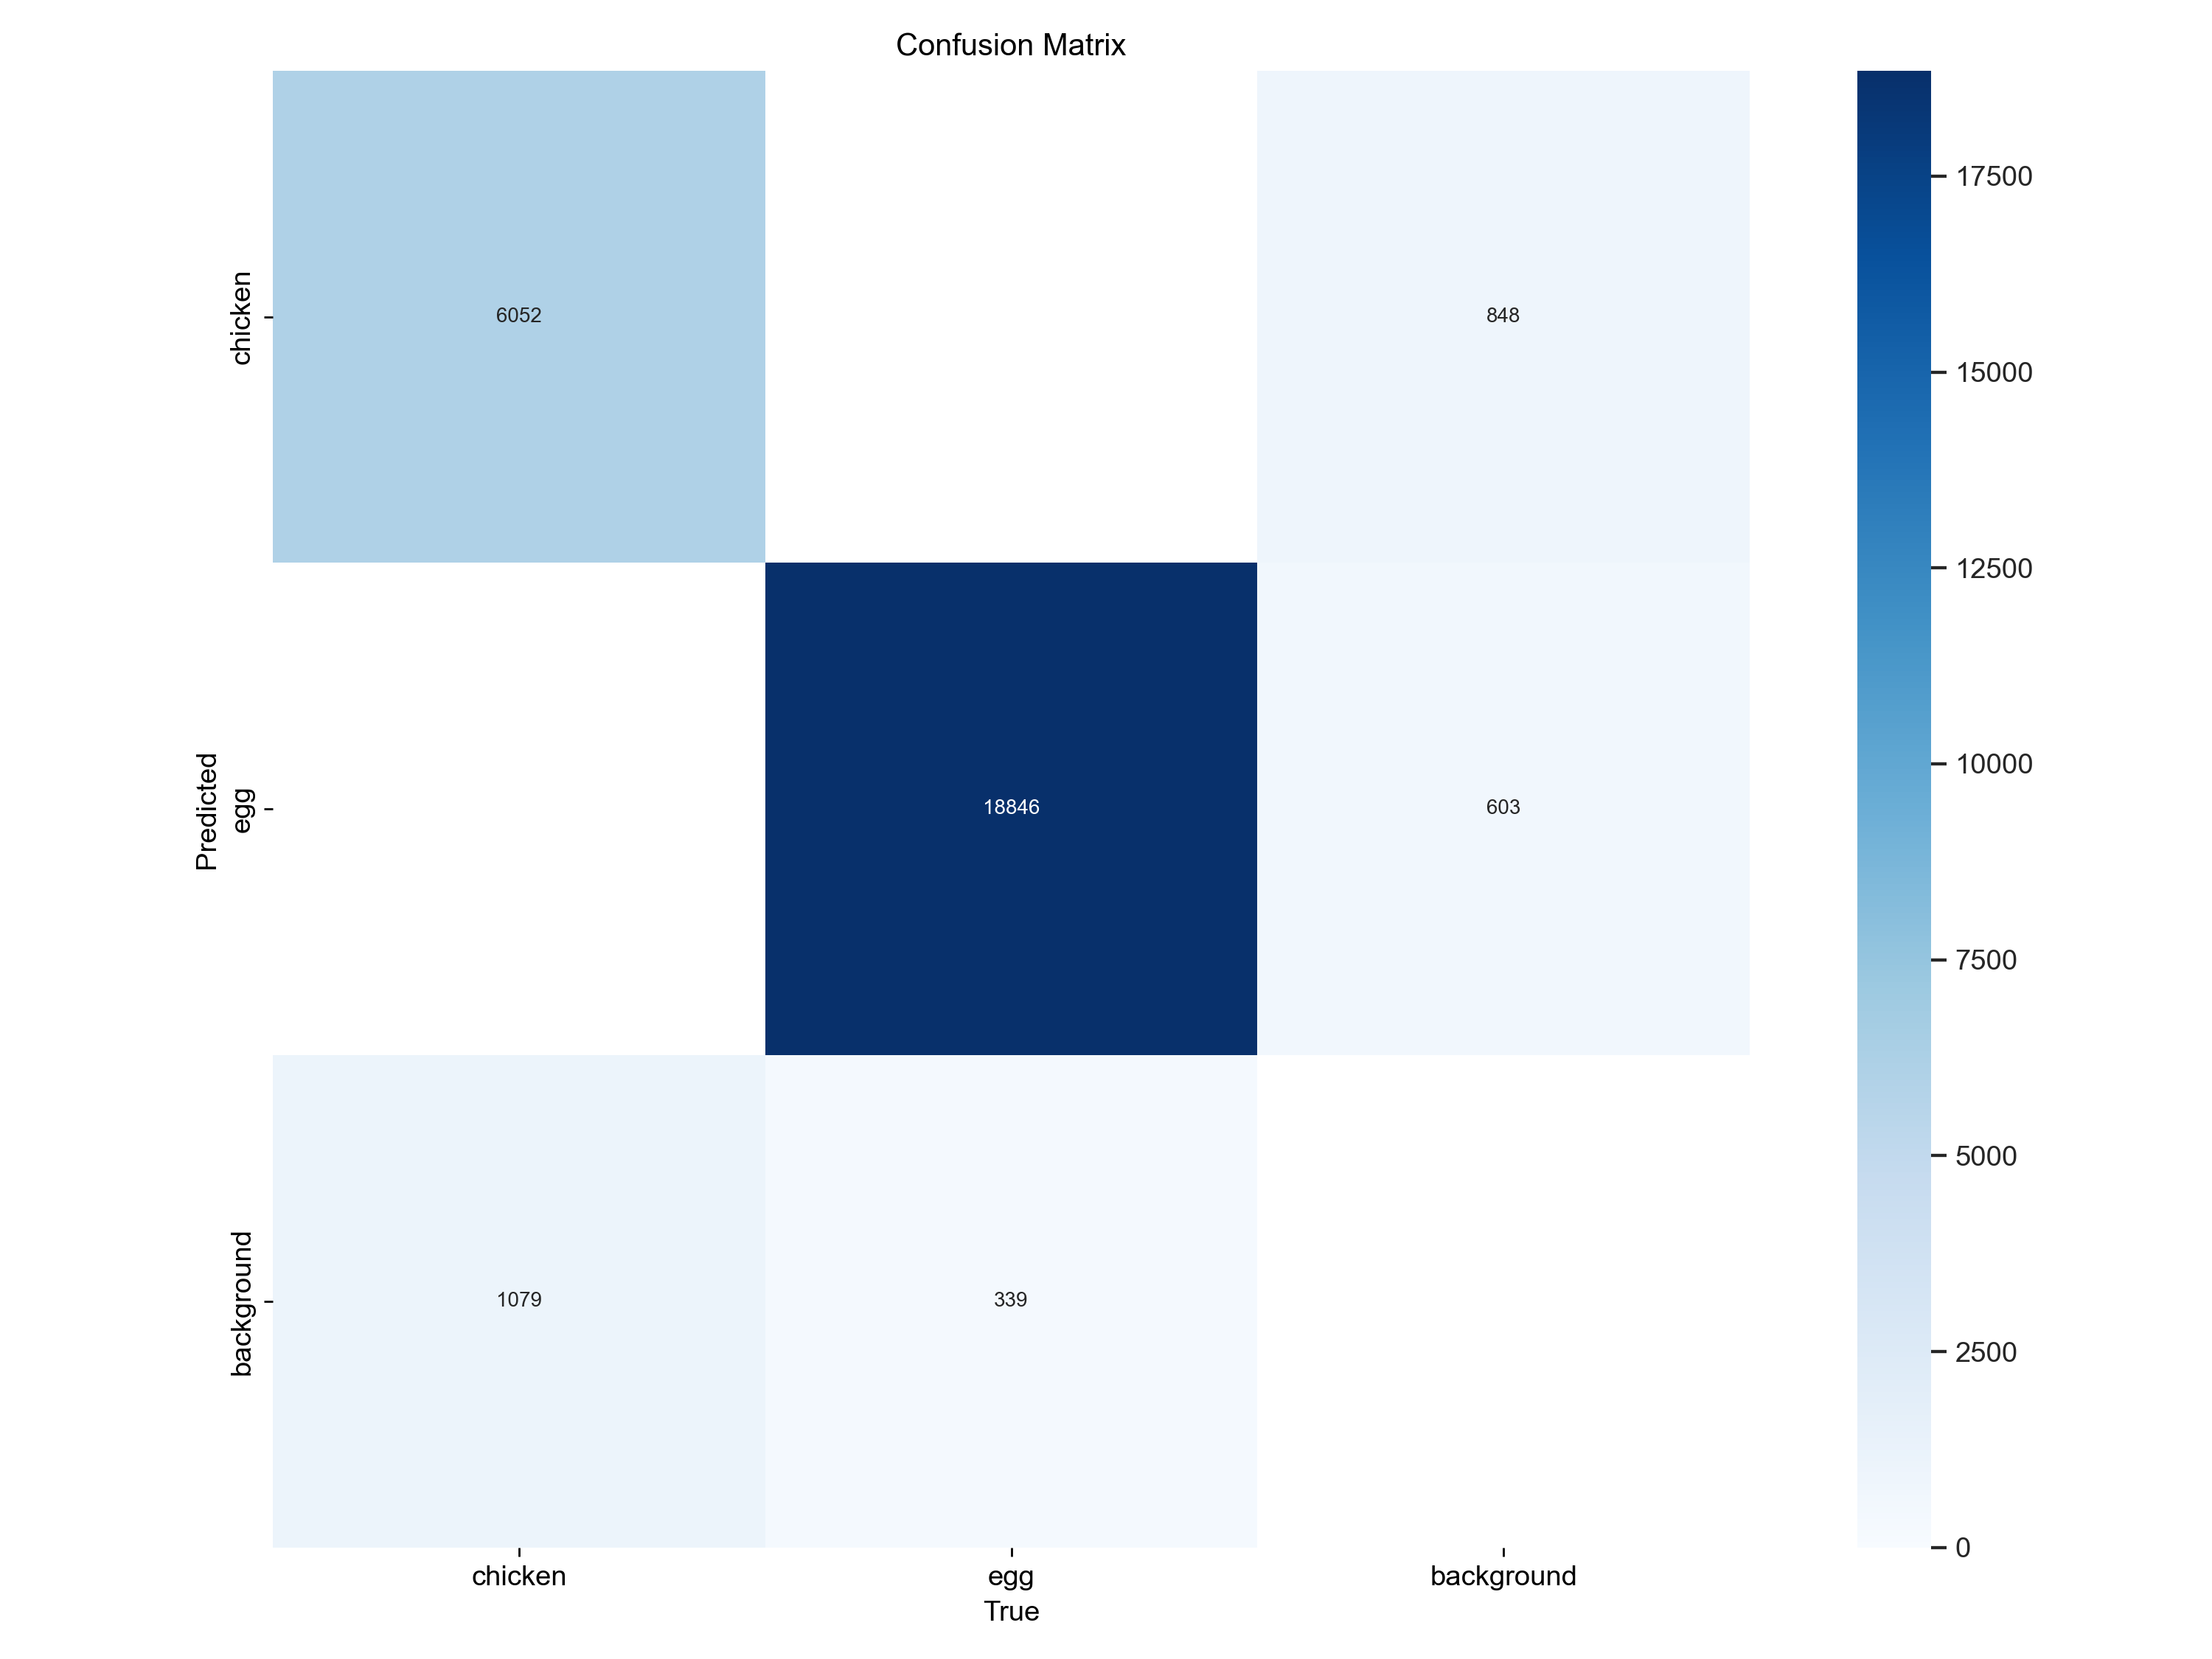

In [1]:
from IPython.display import Image as IPyImage

file_path = r"C:\chickeggs\runs\detect\train4\confusion_matrix.png"
IPyImage(filename=file_path, width=600)

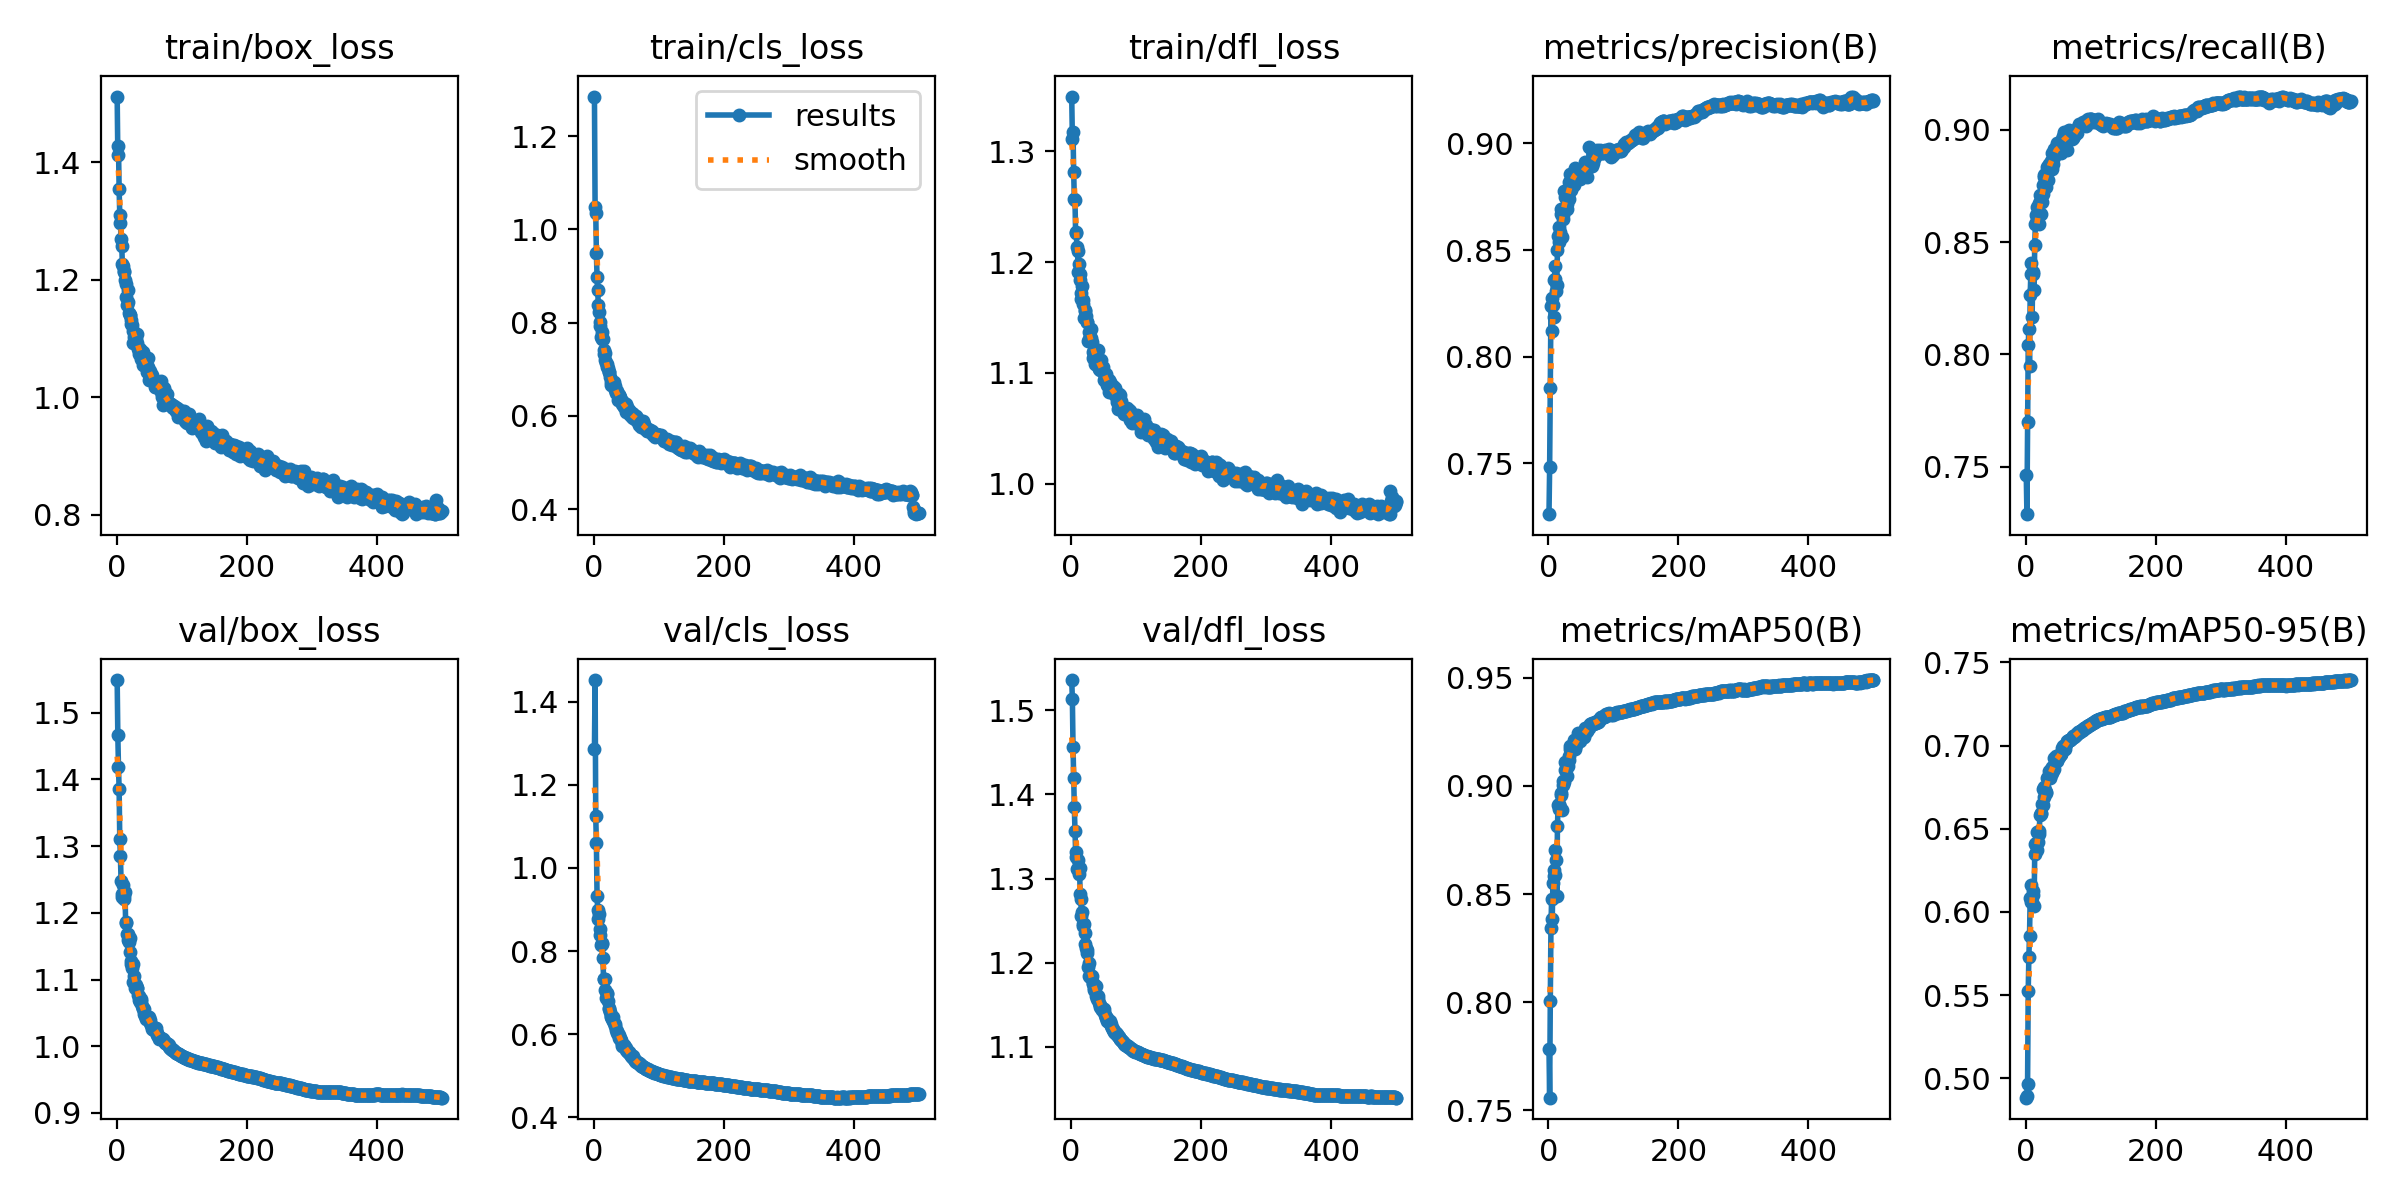

In [4]:
file_path = r"C:\chickeggs\runs\detect\train4\results.png"
IPyImage(filename=file_path, width=600)

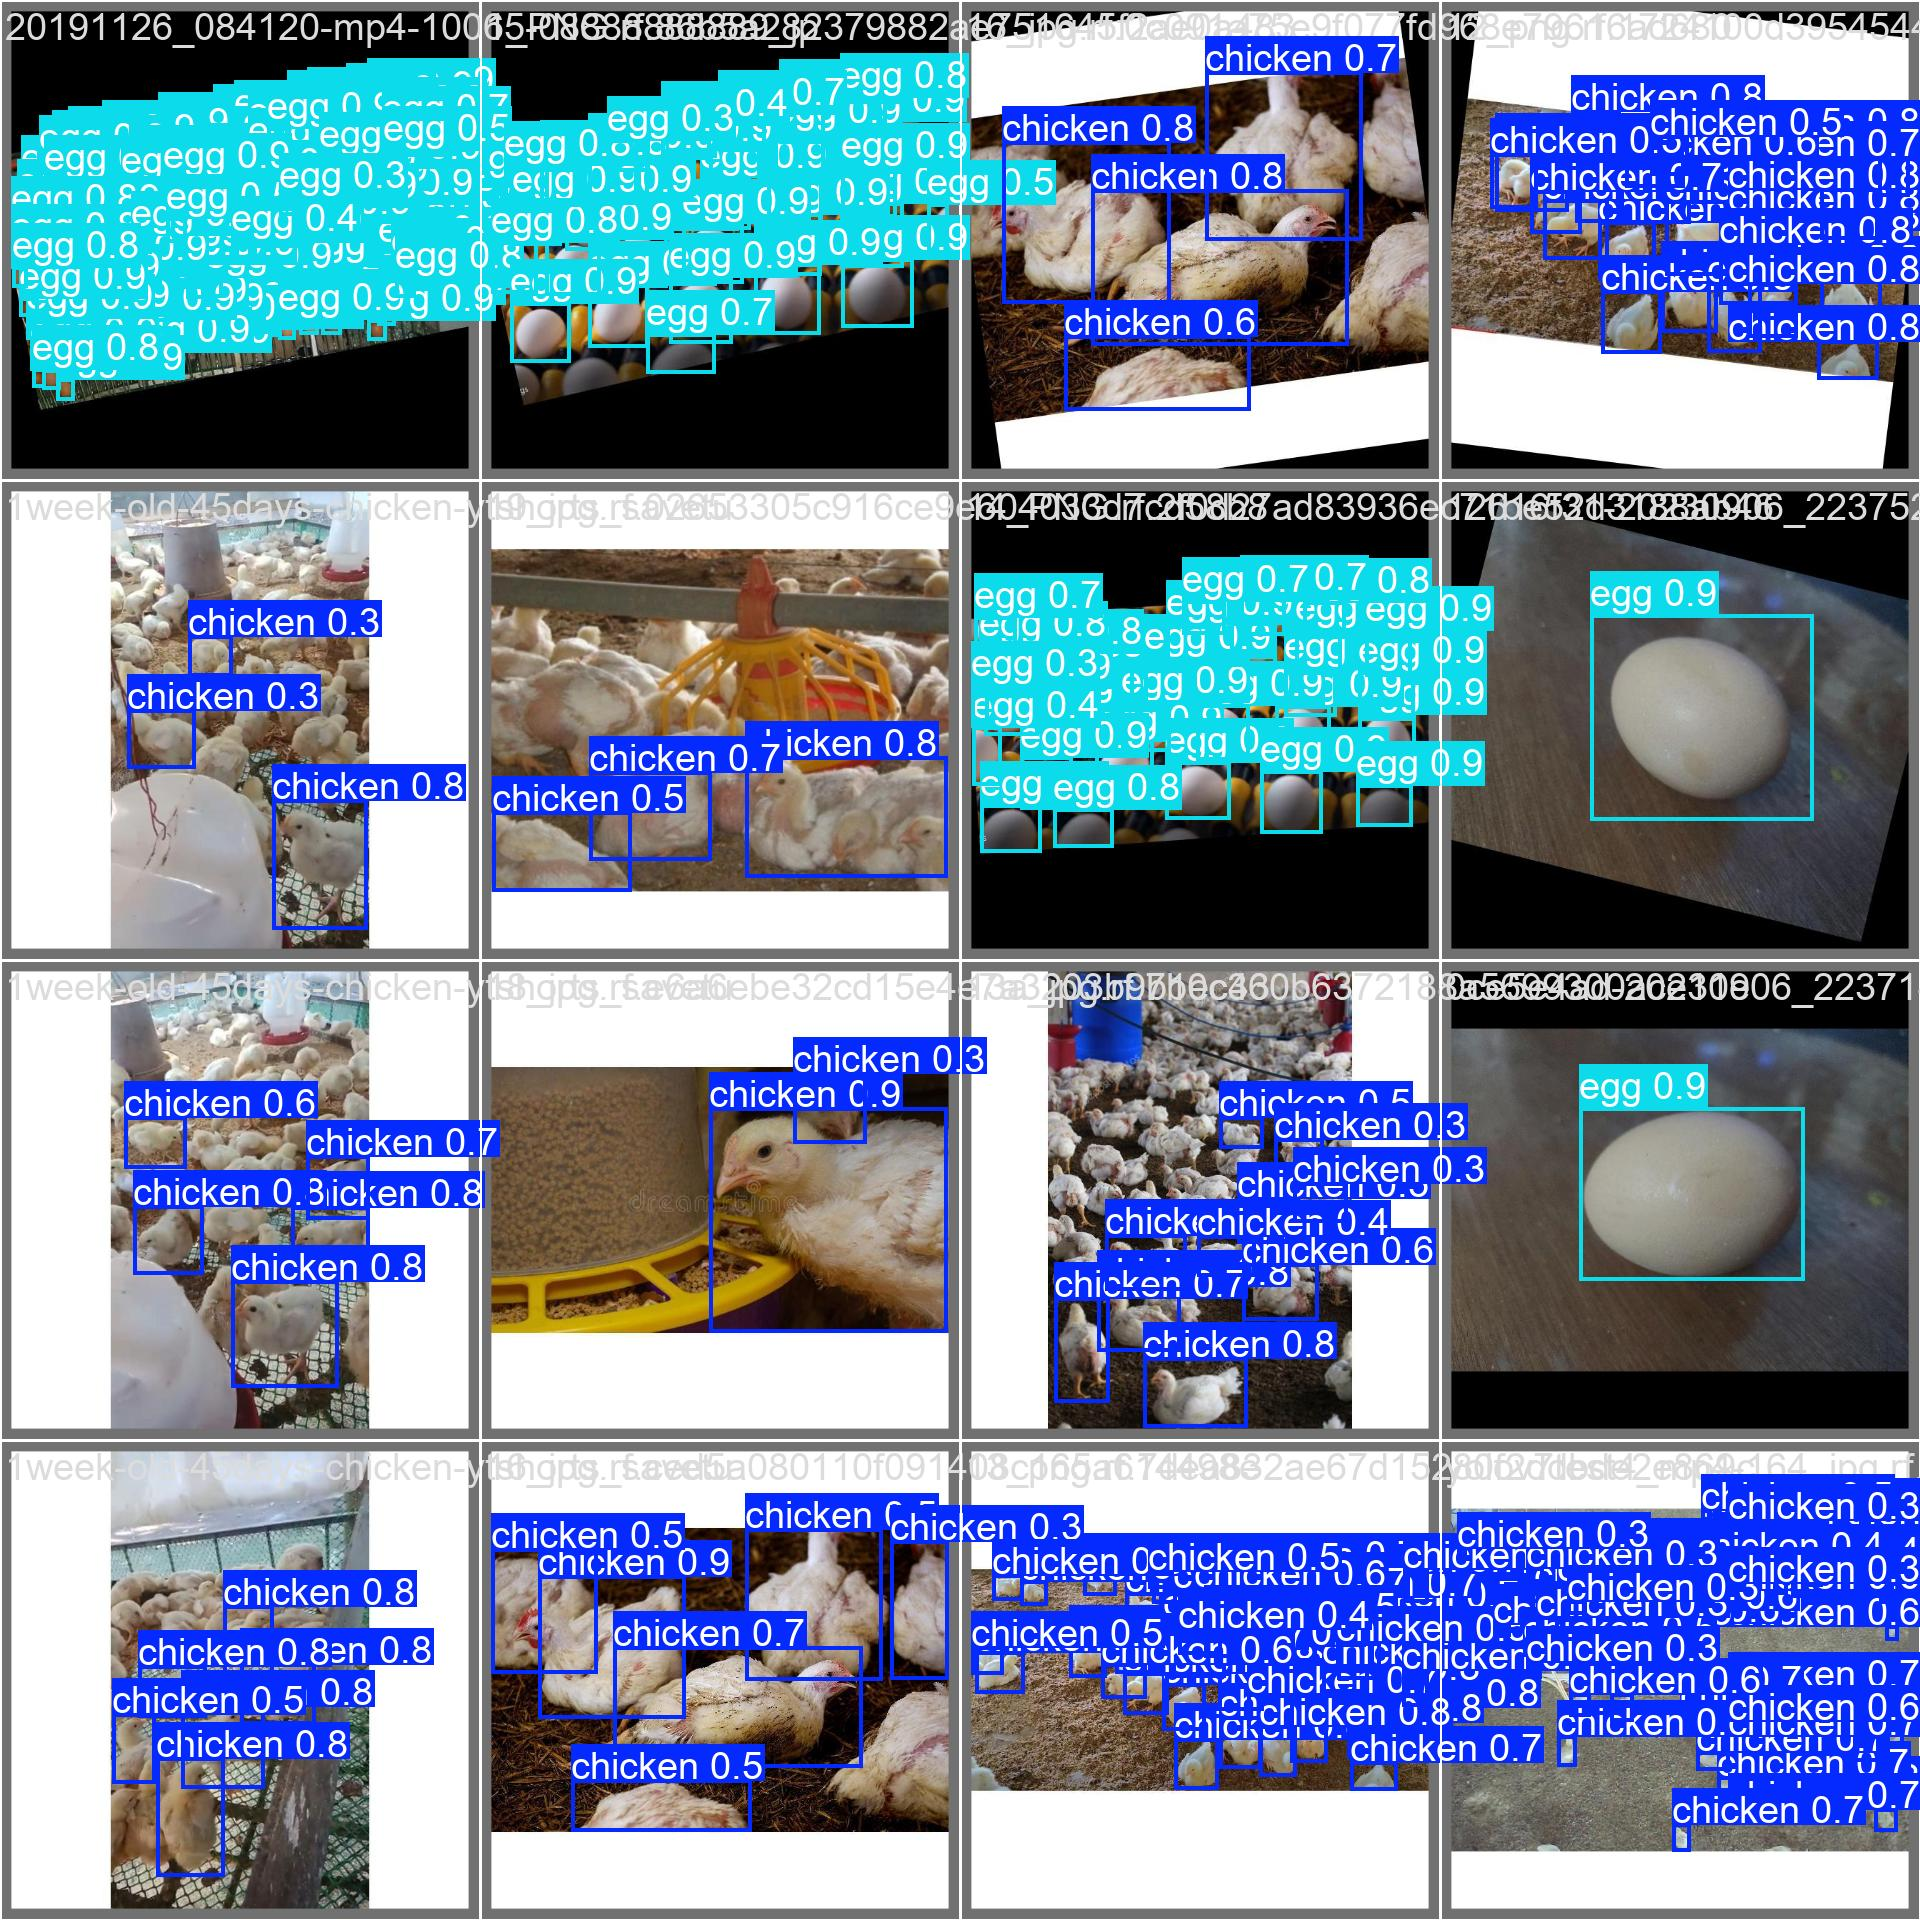

In [6]:
file_path = r"C:\chickeggs\runs\detect\train4\val_batch1_pred.jpg"
IPyImage(filename=file_path, width=600)

In [7]:
from ultralytics import YOLO

# Load the trained model
model = YOLO(r"C:\chickeggs\runs\detect\train3\weights\best.pt")

# Perform prediction and save results in C:\chickeggs
results = model.predict(
    source=r"C:\chickeggs\unseen6.jpg",  
    save=True,                    # Save output image with predictions
    project=r"C:\chickeggs",       # Directory where results are saved
    name="predictions",            # Subfolder name (optional)
    exist_ok=True                  # Prevents error if folder exists
)

print(f"Predictions saved in: C:\\chickeggs\\predictions")



image 1/1 C:\chickeggs\unseen6.jpg: 416x640 8 chickens, 50.2ms
Speed: 2.1ms preprocess, 50.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 640)
Results saved to C:\chickeggs\predictions
Predictions saved in: C:\chickeggs\predictions
